# Intel Scene Classification Challenge

### importing libraries

In [2]:
import numpy as np
import tensorflow as tf
import math, cv2, os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
%matplotlib inline
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from random import randint
from sklearn.utils import shuffle
%load_ext tensorboard
%tensorboard --logdir logs
print(tf.__version__)

train_dataset_path = "C:/Users/Sushmita/Documents/mini project docs/seg_train"
test_dataset_path = "C:/Users/Sushmita/Documents/mini project docs/seg_test"
pred_dataset_path = "C:/Users/Sushmita/Documents/mini project docs/seg_pred"

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dataset_path,
        target_size=(150, 150),
        color_mode='rgb',
        batch_size=32,
        shuffle=True,
        seed=None,
        class_mode="categorical")

test_generator = test_datagen.flow_from_directory(
        test_dataset_path,
        target_size=(150, 150),
        color_mode='rgb',
        batch_size=32,
        shuffle=True,
        seed=None,
        class_mode="categorical")

ERROR: Timed out waiting for TensorBoard to start. It may still be running as pid 6492.

1.14.0
Found 13244 images belonging to 6 classes.
Found 3009 images belonging to 6 classes.


### Building a model

In [7]:
base_model = tf.keras.applications.MobileNetV2(input_shape=(150, 150, 3),
                                               include_top=False)
base_model.trainable = True
print("Number of layers in the base model: ", len(base_model.layers))
fine_tune_at = 100
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False
model = tf.keras.Sequential([
  base_model,
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(6, activation='sigmoid')
  tf.keras.layers.Dropout(rate=0.5)
])
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

9412608/9406464 [==============================] - 264s 28us/step
Number of layers in the base model:  155
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 6)                 7686      
Total params: 2,265,670
Trainable params: 1,870,278
Non-trainable params: 395,392
_________________________________________________________________


In [8]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.99):
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks_max_acc = myCallback()

def get_images(directory):
    Images = []
        
    for image_file in all_image_paths:
        image=cv2.imread(directory+'/'+image_file)
        image=cv2.resize(image,(150,150))
        Images.append(image)
    
    return shuffle(Images,random_state=817328462)

tensorboard_callback = tf.keras.callbacks.TensorBoard("logs")

### Training a model

In [9]:
history = model.fit_generator(
      train_generator,
      epochs=10,
      validation_data=test_generator,
      callbacks=[callbacks_max_acc, tensorboard_callback])


Epoch 1/10
414/414 [==============================] - 827s 2s/step - loss: 0.2213 - acc: 0.9141 - val_loss: 0.2662 - val_acc: 0.9009
Epoch 2/10
414/414 [==============================] - 815s 2s/step - loss: 0.0883 - acc: 0.9693 - val_loss: 0.1175 - val_acc: 0.9562
Epoch 3/10
414/414 [==============================] - 812s 2s/step - loss: 0.0669 - acc: 0.9759 - val_loss: 0.0983 - val_acc: 0.9637
Epoch 4/10
414/414 [==============================] - 921s 2s/step - loss: 0.0550 - acc: 0.9801 - val_loss: 0.0940 - val_acc: 0.9649
Epoch 5/10
414/414 [==============================] - 1075s 3s/step - loss: 0.0453 - acc: 0.9838 - val_loss: 0.0981 - val_acc: 0.9647
Epoch 6/10
414/414 [==============================] - 1075s 3s/step - loss: 0.0388 - acc: 0.9866 - val_loss: 0.1042 - val_acc: 0.9622
Epoch 7/10
414/414 [==============================] - 1072s 3s/step - loss: 0.0319 - acc: 0.9894 - val_loss: 0.1003 - val_acc: 0.9652
Epoch 8/10
413/414 [============================>.] - ETA: 2s - lo

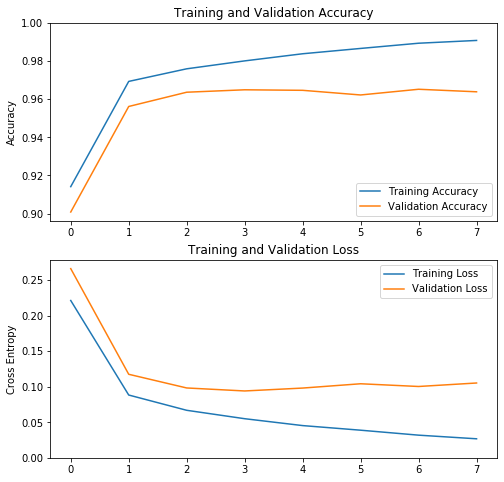

In [10]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.show()

In [11]:
all_image_paths=os.listdir(pred_dataset_path)

print(all_image_paths[:10])

pred_images = get_images(pred_dataset_path)
pred_images = np.array(pred_images)
pred_images.shape

['10004.jpg', '10005.jpg', '10012.jpg', '10013.jpg', '10017.jpg', '10021.jpg', '1003.jpg', '10034.jpg', '10038.jpg', '10040.jpg']


(4105, 150, 150, 3)

### Probability of prediction

c:\users\sushmita\appdata\local\conda\conda\envs\suma\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


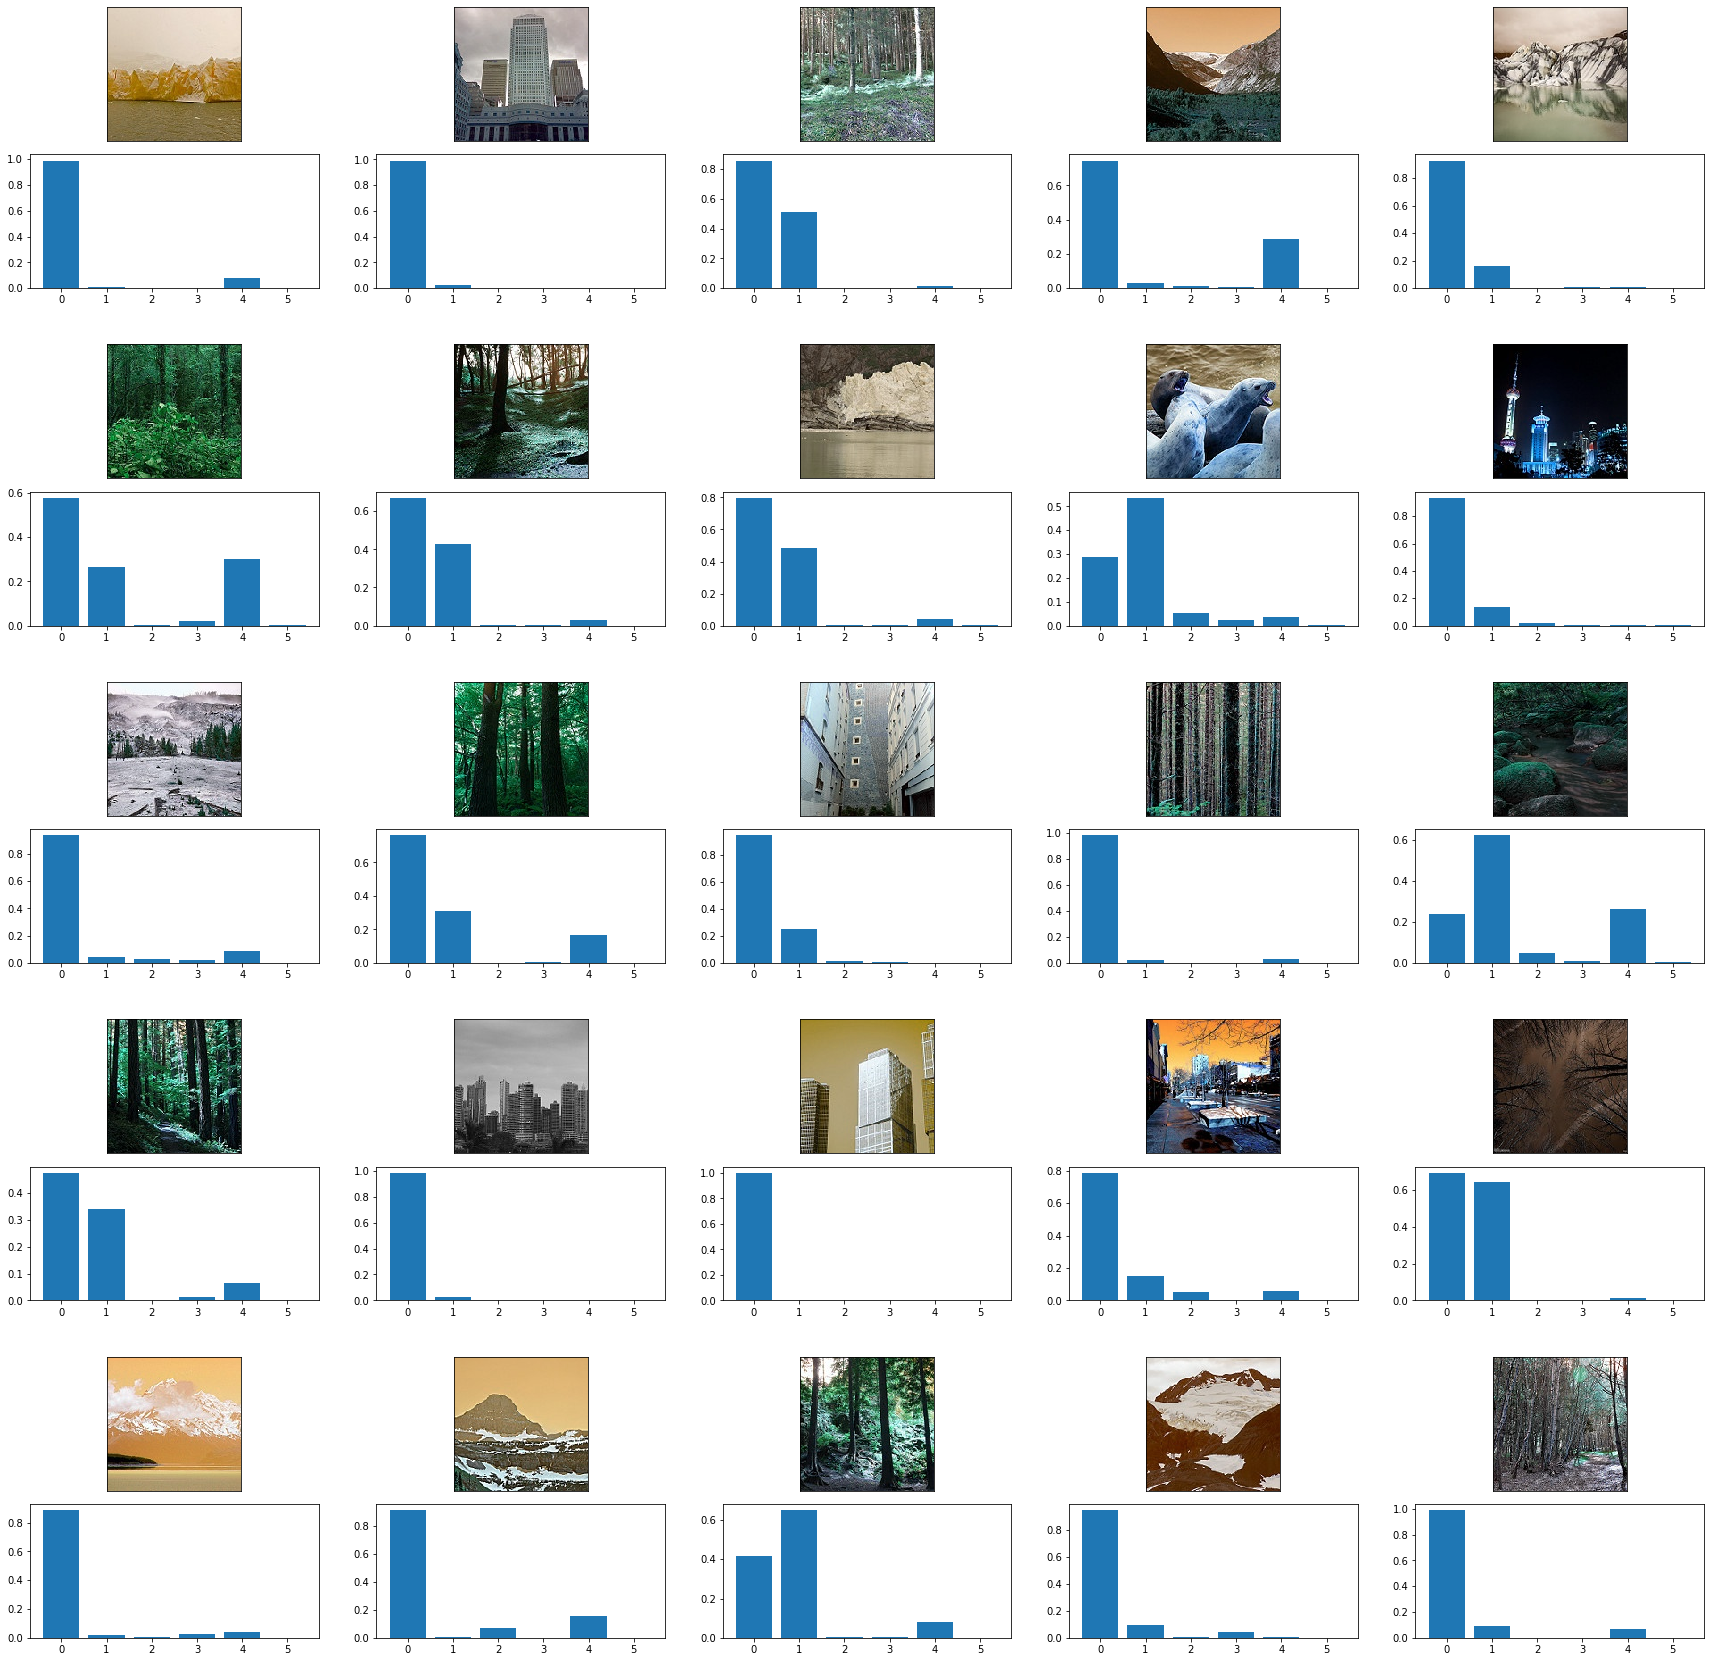

In [12]:
fig = plt.figure(figsize=(30, 30))
outer = gridspec.GridSpec(5, 5, wspace=0.2, hspace=0.2)

for i in range(25):
    inner = gridspec.GridSpecFromSubplotSpec(2, 1,subplot_spec=outer[i], wspace=0.1, hspace=0.1)
    rnd_number = randint(0,len(pred_images))
    pred_image = np.array([pred_images[rnd_number]])
    pred_prob = model.predict(pred_image).reshape(6)
    for j in range(2):
        if (j%2) == 0:
            ax = plt.Subplot(fig, inner[j])
            ax.imshow(pred_image[0])
            ax.set_xticks([])
            ax.set_yticks([])
            fig.add_subplot(ax)
        else:
            ax = plt.Subplot(fig, inner[j])
            ax.bar([0,1,2,3,4,5],pred_prob)
            fig.add_subplot(ax)


fig.show()

In [32]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from IPython.display import SVG

### Confusion Matrix

In [37]:
size=(150,150)
epochs = 10
batch_size = 32
num_of_train_samples = 13244
num_of_test_samples = 3009
validation_generator = test_datagen.flow_from_directory(test_dataset_path,
                                                        target_size=size,
                                                        batch_size=batch_size,
                                                        class_mode='categorical',
                                                        shuffle=False)

Y_pred = model.predict_generator(validation_generator, num_of_test_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)


c=0
for i in range(len(validation_generator.classes)):
  if validation_generator.classes[i]==y_pred[i]:
    c+=1
    

conf_mx=confusion_matrix(validation_generator.classes, y_pred)
print('Confusion Matrix')

print(conf_mx)

Found 3009 images belonging to 6 classes.
Confusion Matrix
[[407   1   3   1   1  24]
 [  0 473   1   0   0   0]
 [  2   3 498  30  26   3]
 [  3   3 120 366  30   3]
 [  1   4  10   1 492   2]
 [ 41   2   1   1   4 452]]


In [35]:
def plot_confusion_matrix(matrix):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

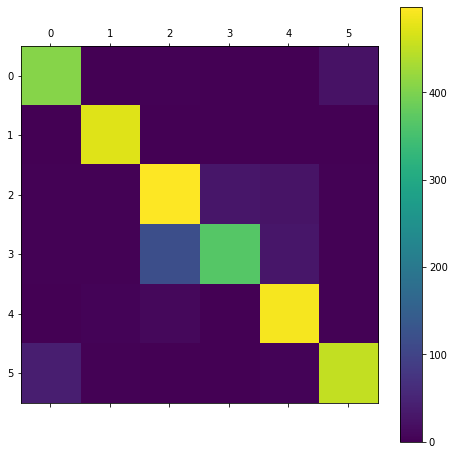

In [36]:
plot_confusion_matrix(conf_mx)

### Errors of prediction between two classes

In [38]:
#Shows errors of prediction between two classes, limited to n images
#Not symetric, will show images from class cl1 predicted as images from class cl2
def errors(predictions, cl1, cl2, n):
  _,ax = plt.subplots(n//5,5, figsize = (15,15)) 
  c=0
  for k in range(len(validation_generator.classes)):
    if validation_generator.classes[k]==cl1 and predictions[k]==cl2 and c<n:
      path = validation_generator.filepaths[k]
      image = cv2.imread(path)
      image = cv2.resize(image,size)
      i=c//5
      j=c%5
      ax[i,j].imshow(image)
      ax[i,j].set_title('predicted : '+label_to_class[cl2])
      ax[i,j].axis('off')
      c+=1

In [40]:
label_to_class={
    0 : 'buildings',
    1 : 'forest',
    2 : 'glacier',
    3 : 'mountain',
    4 : 'sea',
    5 : 'street'
}

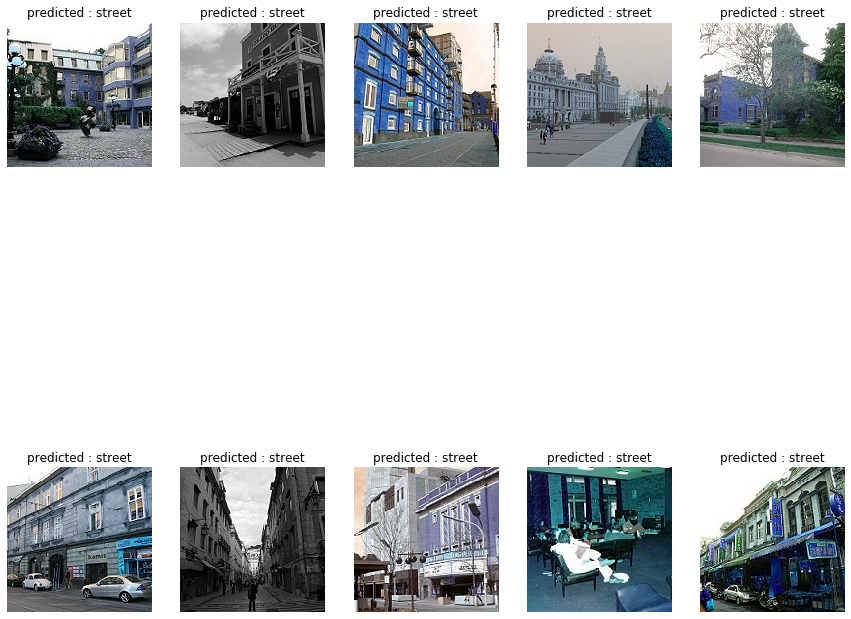

In [41]:
#Images of buildings classified as streets
errors(y_pred,0,5,10)

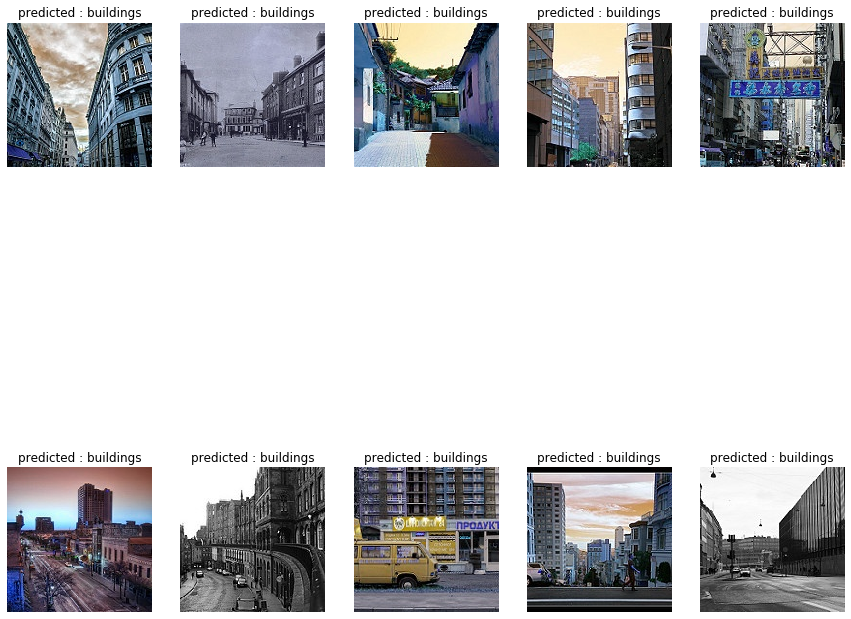

In [42]:
#Images of streets classified as buildings
errors(y_pred,5,0,10)

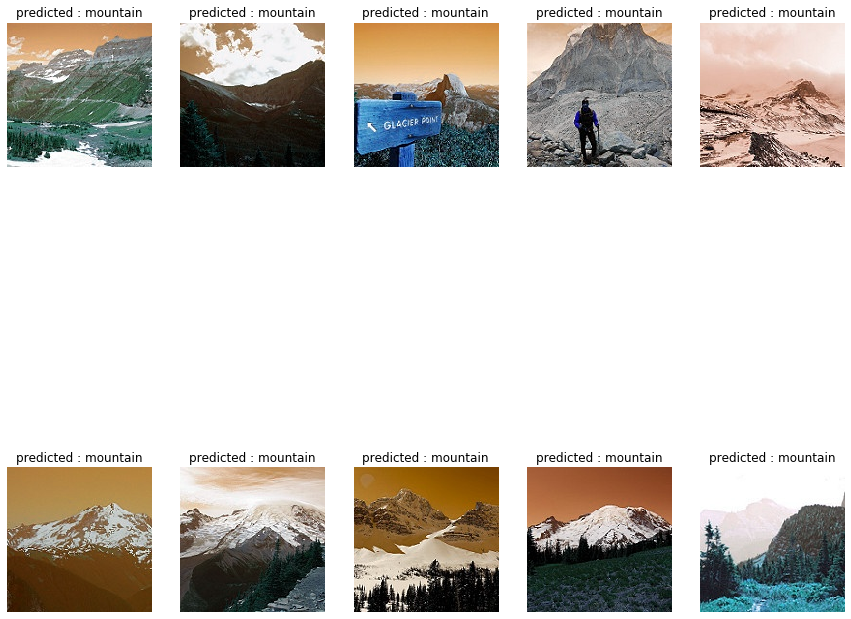

In [43]:
#Images of glaciers classified as mountains
errors(y_pred,2,3,10)

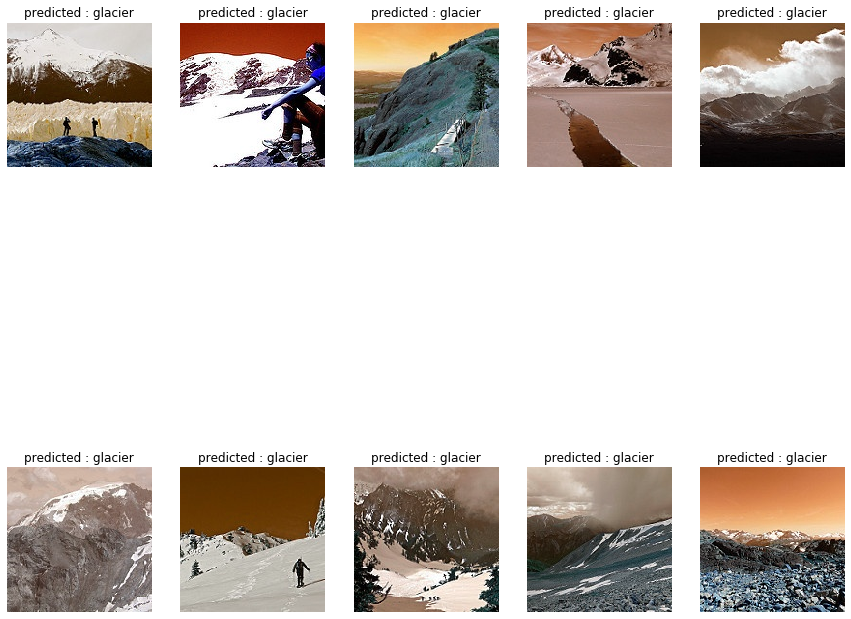

In [44]:
#Images of mountains classified as glaciers
errors(y_pred,3,2,10)